In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt, dates

Imports several libraries commonly used for data analysis in Python: pandas, numpy, seaborn, matplotlib.pyplot, matplotlib.dates

# **1. Ingestion**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount Google Drive

In [ ]:
csv_02 = '/content/drive/My Drive/Colab Notebooks/Capstone/msn_02_no_leak.csv'
msn_02_no_leak = pd.read_csv(csv_02, delimiter=',')

Read a CSV file into a Pandas DataFrame

In [ ]:
msn_02_no_leak.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,cumsum_TOTAL_FUEL_USED_DIFF,EXP_FOB,LEAKEGE
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075,1,NaN,0.0,0.0,0.0000,26046.0000,0
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075,1,NaN,0.0,0.0,2.0279,26043.9721,0
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475,1,NaN,0.0,0.0,4.1823,26041.8177,0
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875,1,NaN,0.0,0.0,6.2113,26039.7887,0
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175,1,NaN,0.0,0.0,8.4291,26037.5709,0


Display the first few rows of the DataFrame.

In [ ]:
msn_02_no_leak.shape

(224062, 18)

Print a tuple containing two integers representing the dimensions of the DataFrame msn_02_no_leak.

In [ ]:
csv2_02 = '/content/drive/My Drive/Colab Notebooks/Capstone/msn_02_leak.csv'
msn_02_leak = pd.read_csv(csv2_02, delimiter=',')

Reads a CSV file into a Pandas DataFrame

In [ ]:
msn_02_leak.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE,Cluster,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,LEAKEGE_PER_SECOND,TOTAL_FUEL_USED_DIFF_LEAK,cumsum_TOTAL_FUEL_USED_DIFF_LEAK,EXP_FOB,LEAKEGE
0,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,14048.0,0.0,0.0000,1901.16075,1,NaN,0.0,0.0,0.0,0.0000,0.0000,26046.0000,1
1,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,1.0,14048.0,4.0,2.0279,1899.87075,1,NaN,0.0,0.0,0.0,2.0279,2.0279,26043.9721,1
2,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,2.0,14048.0,4.0,2.1544,1901.43475,1,NaN,0.0,0.0,0.0,2.1544,4.1823,26041.8177,1
3,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,3.0,14048.0,6.0,2.0290,1902.22875,1,NaN,0.0,0.0,0.0,2.0290,6.2113,26039.7887,1
4,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,4.0,14048.0,3.0,2.2178,1900.75175,1,NaN,0.0,0.0,0.0,2.2178,8.4291,26037.5709,1


Display the first few rows of the DataFrame

In [ ]:
msn_02_leak = msn_02_leak.drop(["LEAKEGE_PER_SECOND", "TOTAL_FUEL_USED_DIFF_LEAK"], axis=1)
msn_02_leak.shape

(224062, 18)

Modifies the msn_02_leak DataFrame by removing two columns and then checks its size

In [ ]:
msn_02_leak = msn_02_leak.rename(columns={'cumsum_TOTAL_FUEL_USED_DIFF_LEAK': 'cumsum_TOTAL_FUEL_USED_DIFF'})

Modifies the msn_02_leak DataFrame by renaming a column

In [ ]:
msn_02_leak.shape

(224062, 18)

Print a tuple containing the number of rows and columns in the DataFrame

# **2. msn_02_leak & msn_02_no_leak Concatenation to merged_df**

In [ ]:
merged_df = pd.concat([msn_02_no_leak, msn_02_leak])
merged_df.shape

(448124, 18)

Combines two DataFrames, msn_02_no_leak and msn_02_leak, into a new DataFrame named merged_df and then checks its size.

In [ ]:
merged_df.isna().mean()

UTC_TIME                          0.000000
Flight                            0.000000
FLIGHT_PHASE_COUNT                0.000000
VALUE_FOB                         0.000000
FW_GEO_ALTITUDE                   0.000000
TOTAL_FUEL_USED                   0.000000
SECONDS_PER_FLIGHT                0.000000
TOTAL_SECONDS_PER_FLIGHT          0.000000
VALUE_FOB_DIFF                    0.000000
TOTAL_FUEL_USED_DIFF              0.000000
FUEL_FLOW_AVE                     0.000000
Cluster                           0.000000
VALUE_FOB_SMOOTHED                0.084628
VALUE_FOB_SMOOTHED_DIFF           0.000000
cumsum_VALUE_FOB_SMOOTHED_DIFF    0.000000
cumsum_TOTAL_FUEL_USED_DIFF       0.000000
EXP_FOB                           0.000000
LEAKEGE                           0.000000
dtype: float64

Calculates and displays the average amount of missing values (NaN) in each column of the DataFrame

In [ ]:
merged_df.dropna(inplace=True)

Modifies the DataFrame merged_df by removing rows containing missing values (NaN).

In [ ]:
merged_df_copy = merged_df.copy()

Creates a copy of the DataFrame merged_df and assigns it to a new DataFrame named merged_df_copy.

# **3. merged_df_copy Filtering**

In [ ]:
merged_df_copy = merged_df_copy.drop(columns=['UTC_TIME','Flight','FLIGHT_PHASE_COUNT','Cluster','TOTAL_FUEL_USED','TOTAL_FUEL_USED_DIFF','cumsum_TOTAL_FUEL_USED_DIFF', 'VALUE_FOB', 'EXP_FOB'])

This code removes the following columns from the DataFrame merged_df_copy:

- 'UTC_TIME' (potentially timestamps)
- 'Flight' (likely flight identifiers)
- 'FLIGHT_PHASE_COUNT' (possibly the number of flight phases)
- 'Cluster' (data clustering information, if applicable)
- 'TOTAL_FUEL_USED' (original total fuel used, might be redundant)
- 'TOTAL_FUEL_USED_DIFF' (difference in total fuel used, might be redundant)
- 'cumsum_TOTAL_FUEL_USED_DIFF' (cumulative fuel used with leakage, you might not need it anymore)
- 'VALUE_FOB' (smoothed fuel on board, might have been used for calculations)
- 'EXP_FOB' (expected fuel on board considering leakage, might have been used for analysis)

In [ ]:
merged_df_copy

,FW_GEO_ALTITUDE,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,FUEL_FLOW_AVE,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,LEAKEGE
499,8223.375,499.0,14048.0,5.0,1431.93725,25681.532,0.000,0.000,0
500,8222.750,500.0,14048.0,2.0,1401.60525,25680.178,1.354,1.354,0
501,8222.375,501.0,14048.0,1.0,1381.94775,25678.830,1.348,2.702,0
502,8222.250,502.0,14048.0,-1.0,1368.04025,25677.492,1.338,4.040,0
503,8222.375,503.0,14048.0,-2.0,1355.03650,25676.170,1.322,5.362,0
...,...,...,...,...,...,...,...,...,...
224057,13084.130,6824.0,16002.0,2.0,1662.75375,19033.806,2.386,7792.964,1
224058,13140.380,6826.0,16002.0,1.0,1662.64700,19031.418,2.388,7795.352,1
224059,13168.630,6827.0,16002.0,3.0,1662.62850,19029.026,2.392,7797.744,1
224060,13225.130,6829.0,16002.0,1.0,1662.63700,19026.642,2.384,7800.128,1


Display merged_df_copy

In [ ]:
merged_df_copy.isna().mean()

FW_GEO_ALTITUDE                   0.0
SECONDS_PER_FLIGHT                0.0
TOTAL_SECONDS_PER_FLIGHT          0.0
VALUE_FOB_DIFF                    0.0
FUEL_FLOW_AVE                     0.0
VALUE_FOB_SMOOTHED                0.0
VALUE_FOB_SMOOTHED_DIFF           0.0
cumsum_VALUE_FOB_SMOOTHED_DIFF    0.0
LEAKEGE                           0.0
dtype: float64

Calculates the average amount of missing values (NaN) in each column of the DataFrame merged_df_copy

# **4. Predictive Model Creation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = merged_df_copy.drop('LEAKEGE', axis=1)
y = merged_df_copy['LEAKEGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

Splits the dataset into features (X) and target variable (y).
Further splits the data into training, testing, and validation sets using the train_test_split function from scikit-learn.
The test_size parameter is set to 0.2 for the initial split and 0.25 for the split between test and validation sets.
The random_state parameter ensures reproducibility of the split.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_val_normalized = min_max_scaler.transform(X_val)
X_test_normalized = min_max_scaler.transform(X_test)
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_val_normalized_df = pd.DataFrame(X_val_normalized, columns=X_val.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)
X_train_normalized_df.shape, X_val_normalized_df.shape, X_test_normalized_df.shape

((328160, 8), (20510, 8), (61530, 8))

Uses MinMaxScaler from scikit-learn to normalize the features in the training, validation, and test sets.
Creates DataFrames (X_train_normalized_df, X_val_normalized_df, X_test_normalized_df) to store the normalized sets.
Displays the shape of the normalized sets for verification.

## **4.1. Logistic Regression Model**

### **4.1.1. Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
log_reg = LogisticRegression()
log_reg.fit(X_train_normalized, y_train)
y_val_pred_log = log_reg.predict(X_val_normalized)
accuracy_log = accuracy_score(y_val, y_val_pred_log)
f1_log = f1_score(y_val, y_val_pred_log)
recall_log = recall_score(y_val, y_val_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log}")
print(f"Logistic Regression F1 Score: {f1_log}")
print(f"Logistic Regression Recall: {recall_log}")

Logistic Regression Accuracy: 0.4947830326669917
Logistic Regression F1 Score: 0.5638154571476679
Logistic Regression Recall: 0.6603885218420275


Creates a Logistic Regression model.
Fits the model on the training data (X_train_normalized, y_train).
Makes predictions on the validation set (X_val_normalized).
Evaluates the accuracy, F1 score, and recall of the Logistic Regression model on the validation set and prints the results.

### **4.1.2. Logistic Regression Model applying GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none']
}
log_reg = LogisticRegression(solver='lbfgs', random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_
y_val_pred_log = best_log_reg.predict(X_val_normalized)
accuracy_log = accuracy_score(y_val, y_val_pred_log)
f1_log = f1_score(y_val, y_val_pred_log)
recall_log = recall_score(y_val, y_val_pred_log)
print("Best Parameters:", best_params)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Logistic Regression F1 Score: {f1_log:.4f}")
print(f"Logistic Regression Recall: {recall_log:.4f}")

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.4942
Logistic Regression F1 Score: 0.5952
Logistic Regression Recall: 0.7521


Utilizes GridSearchCV to perform hyperparameter tuning for a Logistic Regression model using the provided parameter grid.
Fits the model on the training data (X_train_normalized, y_train).
Prints and stores the best hyperparameters and the best Logistic Regression model.
Makes predictions on the validation set (X_val_normalized).
Evaluates the accuracy, F1 score, and recall of the Logistic Regression model on the validation set and prints the results.

In [ ]:
import pickle
drive_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/logistic_regression_classifier_1.pkl'
with open(drive_path, 'wb') as file:
    pickle.dump(best_log_reg, file)
print("Model saved in:", drive_path)

Model saved in: /content/drive/MyDrive/Colab Notebooks/Capstone/logistic_regression_classifier_1.pkl


This Model Aquires the best metrics when talking about Recall and F1 Score, so will be our model

### **4.1.3. Logistic Regression Model applying SMOTE balance**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)
y_val_pred_log = log_reg.predict(X_val_normalized)
accuracy_log = accuracy_score(y_val, y_val_pred_log)
f1_log = f1_score(y_val, y_val_pred_log)
recall_log = recall_score(y_val, y_val_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Logistic Regression F1 Score: {f1_log:.4f}")
print(f"Logistic Regression Recall: {recall_log:.4f}")

Logistic Regression Accuracy: 0.4939
Logistic Regression F1 Score: 0.4890
Logistic Regression Recall: 0.4899


Applies Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance.
Initializes SMOTE, then applies it to the training data (X_train_normalized and y_train).
Initializes a Logistic Regression model and fits it to the SMOTE-transformed training data.
Predicts on the validation set (X_val_normalized).
Calculates and prints accuracy, F1 score, and recall metrics.

### **4.1.4. Logistic Regression Model applying GridSearchCV & SMOTE balance**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)
log_reg = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_
y_val_pred_log = best_log_reg.predict(X_val_normalized)
accuracy_log = accuracy_score(y_val, y_val_pred_log)
f1_log = f1_score(y_val, y_val_pred_log)
recall_log = recall_score(y_val, y_val_pred_log)
print("Best Parameters:", best_params)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Logistic Regression F1 Score: {f1_log:.4f}")
print(f"Logistic Regression Recall: {recall_log:.4f}")

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.4978
Logistic Regression F1 Score: 0.5019
Logistic Regression Recall: 0.5118


Applies SMOTE to the training data to address class imbalance.
Performs a grid search over specified hyperparameters (C and penalty) for Logistic Regression using F1 score as the scoring metric.
Prints the best parameters and uses the best logistic regression model to predict on the validation set.
Calculates and prints accuracy, F1 score, and recall metrics.

## **4.2. XGBoost Model**

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_normalized, y_train)
y_val_pred_xgb = xgb_clf.predict(X_val_normalized)
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
f1_xgb = f1_score(y_val, y_val_pred_xgb)
recall_xgb = recall_score(y_val, y_val_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")
print(f"XGBoost Recall: {recall_xgb}")

XGBoost Accuracy: 0.3781569965870307
XGBoost F1 Score: 0.38935171885473524
XGBoost Recall: 0.40094665220392467


Initializes an XGBoost classifier with specified parameters (use_label_encoder=False and eval_metric='logloss').
Fits the XGBoost model on the normalized training data.
Predicts on the validation set and calculates accuracy, F1 score, and recall metrics.
Prints the results of the XGBoost model.

# **5. Predictions on predicted_msn_37**

## **5.1. Ingestion**

In [ ]:
import pandas as pd
import pickle
predicted_msn_37 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/predicted_msn_37.csv')

Reading data from a CSV file named 'predicted_msn_37.csv' located in a specific directory and loads it into a pandas DataFrame

In [ ]:
predicted_msn_37.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424175 entries, 0 to 2424174
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   UTC_TIME                  object 
 1   Flight                    float64
 2   FLIGHT_PHASE_COUNT        float64
 3   VALUE_FOB                 float64
 4   FW_GEO_ALTITUDE           float64
 5   TOTAL_FUEL_USED           float64
 6   SECONDS_PER_FLIGHT        float64
 7   TOTAL_SECONDS_PER_FLIGHT  float64
 8   VALUE_FOB_DIFF            float64
 9   TOTAL_FUEL_USED_DIFF      float64
 10  FUEL_FLOW_AVE             float64
dtypes: float64(10), object(1)
memory usage: 203.4+ MB


Providing a concise summary of the DataFrame 'predicted_msn_37'

In [ ]:
predicted_msn_37.isna().mean()

VALUE_FOB                         0.000000
FW_GEO_ALTITUDE                   0.000000
TOTAL_FUEL_USED                   0.000000
SECONDS_PER_FLIGHT                0.000000
TOTAL_SECONDS_PER_FLIGHT          0.000000
VALUE_FOB_DIFF                    0.000000
TOTAL_FUEL_USED_DIFF              0.000000
FUEL_FLOW_AVE                     0.000000
VALUE_FOB_SMOOTHED                0.044669
VALUE_FOB_SMOOTHED_DIFF           0.000000
cumsum_VALUE_FOB_SMOOTHED_DIFF    0.000000
dtype: float64

Calculating the proportion of missing values in each column of the DataFrame

In [ ]:
predicted_msn_37.dropna(inplace=True)

Dropping the null values

## **5.2. predicted_msn_37 FILTERING**

In [ ]:
predicted_msn_37 = predicted_msn_37[predicted_msn_37['FW_GEO_ALTITUDE'] >= 0]

window_size = 500
predicted_msn_37['VALUE_FOB_SMOOTHED'] = predicted_msn_37.groupby('Flight')['VALUE_FOB'].transform(lambda x: x.rolling(window=window_size).mean())
predicted_msn_37.reset_index(drop=True, inplace=True)

predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'] = predicted_msn_37.groupby('Flight')['VALUE_FOB_SMOOTHED'].diff(periods=1)
predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'] = np.multiply(predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'], -1)
predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'] = predicted_msn_37['VALUE_FOB_SMOOTHED_DIFF'].fillna(0)

predicted_msn_37['cumsum_VALUE_FOB_SMOOTHED_DIFF'] = predicted_msn_37.groupby('Flight')['VALUE_FOB_SMOOTHED_DIFF'].cumsum()

In [ ]:
columns_to_drop = ['UTC_TIME', 'Flight', 'FLIGHT_PHASE_COUNT', 'VALUE_FOB', 'TOTAL_FUEL_USED', 'TOTAL_FUEL_USED_DIFF']
predicted_msn_37.drop(columns=columns_to_drop, inplace=True)

Filtering predicted_msn_37 to get the same columns as in the Logistic Regression Model features

## **5.3. predicted_msn_37 PREDICTION**

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Capstone/logistic_regression_classifier_1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(predicted_msn_37)
final_predicted_msn_37 = predicted_msn_37
final_predicted_msn_37['Predicted_LEAKAGE'] = predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Predicting the new column of final_predicted_msn_37

In [ ]:
final_predicted_msn_37.head()

,FW_GEO_ALTITUDE,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,FUEL_FLOW_AVE,VALUE_FOB_SMOOTHED,VALUE_FOB_SMOOTHED_DIFF,cumsum_VALUE_FOB_SMOOTHED_DIFF,Predicted_LEAKAGE
499,17354.0,499.0,11640.0,2.0,1422.967451,18830.994,0.000,0.000,0
500,17388.0,500.0,11640.0,3.0,1417.156169,18830.986,0.008,0.008,0
501,17426.0,501.0,11640.0,-0.0,1422.967451,18830.998,-0.012,-0.004,0
502,17458.0,502.0,11640.0,1.0,1422.967451,18831.028,-0.030,-0.034,0
503,17491.0,503.0,11640.0,1.0,1422.967451,18831.070,-0.042,-0.076,0


Printing the 5 first rows of the final DataFrame

In [ ]:
leakage_counts = final_predicted_msn_37['Predicted_LEAKAGE'].value_counts()
count_leakage_0 = leakage_counts.get(0, 0)
count_leakage_1 = leakage_counts.get(1, 0)
leakage_percentage = (count_leakage_1/(count_leakage_1+count_leakage_0))*100
print(f"Count of Predicted_LEAKAGE = 0: {count_leakage_0}")
print(f"Count of Predicted_LEAKAGE = 1: {count_leakage_1}")
print(f"Percentage LEAKAGE over non-LEAKAGE: {leakage_percentage}")

Count of Predicted_LEAKAGE = 0: 2187057
Count of Predicted_LEAKAGE = 1: 128804
Percentage LEAKAGE over non-LEAKAGE: 5.561819124722943


Doing mathematic operations to get the quantity of leakages predicted

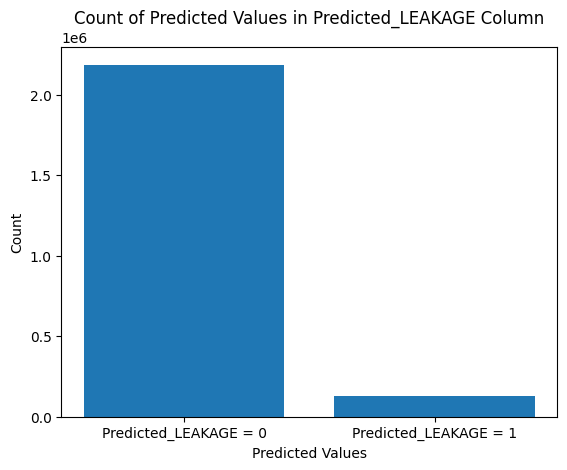

In [ ]:
plt.bar(['Predicted_LEAKAGE = 0', 'Predicted_LEAKAGE = 1'], [count_leakage_0, count_leakage_1])
plt.xlabel('Predicted Values')
plt.ylabel('Count')
plt.title('Count of Predicted Values in Predicted_LEAKAGE Column')
plt.show()

Comparing the count of leakages and not_leakages predictions

In [ ]:
filtered_data = final_predicted_msn_37[final_predicted_msn_37['Predicted_LEAKAGE'] == 1]
nunique_flights = filtered_data['TOTAL_SECONDS_PER_FLIGHT'].nunique()
print(f"The number of unique values in the 'Flights' column where 'Predicted_LEAKAGE' is 1: {nunique_flights}")

The number of unique values in the 'Flights' column where 'Predicted_LEAKAGE' is 1: 35


Counting the number of different flights with predicted leakage

In [ ]:
final_predicted_msn_37.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/final1_predicted_msn_37.csv', index=False)

Saving the final_predicted_msn_37 dataset in Drive as final1_predicted_msn_37.csv